In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

from termcolor import colored

In [2]:
size = 10000

# Tworze sobie 4 rozne rozklady binomial:

Binomial_dict = {
    "Binomial_n=50_p=0.2":np.random.binomial(n=5, p=0.2, size=size),
    "Binomial_n=50_p=0.7":np.random.binomial(n=5, p=0.7, size=size),
    "Binomial_n=100_p=0.2":np.random.binomial(n=50, p=0.2, size=size),
    "Binomial_n=100_p=0.7":np.random.binomial(n=50, p=0.7, size=size)
}

# i robie z nich dataframe:
dataFrameBinomial = pd.DataFrame.from_dict(Binomial_dict)

# i wykonuje operacje melted:
meltedBinomial = dataFrameBinomial.melt()

# Teraz mam przygotowane dane wyswietlenia histogramow

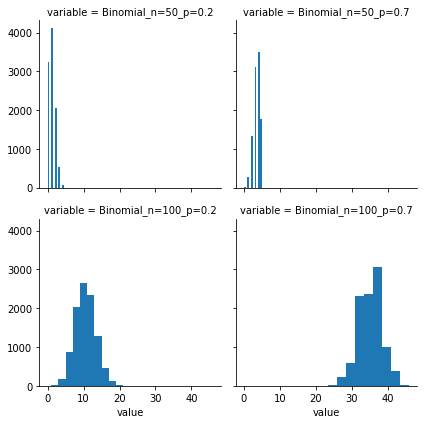

In [3]:
# Wygenerowanie histogramow rozkladow binomial:

Visualization = sn.FacetGrid(meltedBinomial, col="variable", sharex=True, col_wrap=2)
Visualization.map(plt.hist, "value", cumulative=False, bins=10)
    

In [4]:
# Zaladuje jeszcze moduly do wyswietlania wykresow gestosci rozkladu prawdopodobienstwa

import scipy.stats as stats
import matplotlib as mpl

# Pare ustawien dla kolorow i wykresow z wykladow:

light="#FFFCDC"
light_highlight="#FEF590"
mid="#FDED2A"
mid_highlight="#f0dc05"
dark="#EECA02"
dark_highlight="#BB9700"
green="#00FF00"
blue="#0000FF"
red="#FF0000"
light_grey="#DDDDDD"

plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi']= 200

In [5]:
# Tworze sobie 4 rozne rozklady negative binomial:

Negative_Binomial_dict = {
    "Negative_Binomial_n=50_p=0.2":np.random.negative_binomial(n=5, p=0.2, size=size),
    "Negative_Binomial_n=50_p=0.7":np.random.negative_binomial(n=5, p=0.7, size=size),
    "Negative_Binomial_n=100_p=0.2":np.random.negative_binomial(n=50, p=0.2, size=size),
    "Negative_Binomial_n=100_p=0.7":np.random.negative_binomial(n=50, p=0.7, size=size)
}

# i robie z nich dataframe:
dataFrameNegativeBinomial = pd.DataFrame.from_dict(Negative_Binomial_dict)

# i wykonuje operacje melted:
meltedNegativeBinomial = dataFrameNegativeBinomial.melt()

# Teraz mam przygotowane dane wyswietlenia histogramow

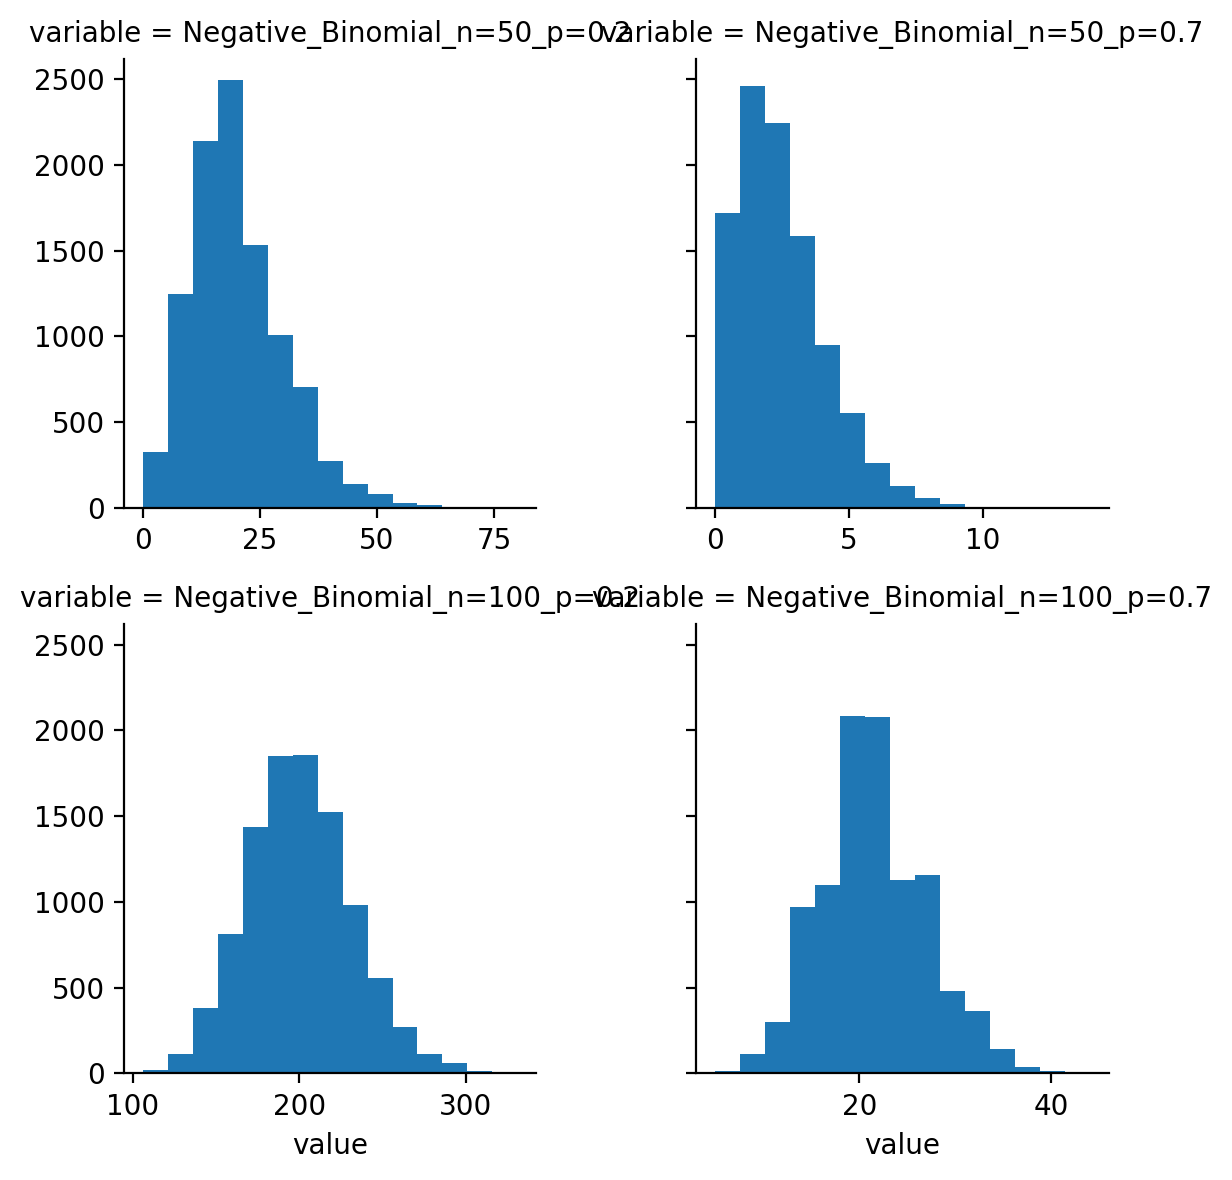

In [6]:
# Wygenerowanie histogramow rozkladow negative binomial:

Visualization = sn.FacetGrid(meltedNegativeBinomial, col="variable", sharex=False, col_wrap=2)
Visualization.map(plt.hist, "value", cumulative=False, bins=15)


In [7]:
# Negative Binomial and Poisson:

# probability of success:
p = [0.2, 0.4, 0.6, 0.8]
# No of trials
n = 100
# Lamba for Poisson
u = []
for i in p:
    u.append(stats.nbinom.mean(n, i))


In [8]:
size = 10000

Comparison_Negative_Binomial_dict = {
    "Negative_Binomial n=100, p=0.2":np.random.negative_binomial(n=n, p=p[0], size=size),
    "Negative_Binomial n=100, p=0.4":np.random.negative_binomial(n=n, p=p[1], size=size),
    "Negative_Binomial n=100, p=0.6":np.random.negative_binomial(n=n, p=p[2], size=size),
    "Negative_Binomial n=100, p=0.8":np.random.negative_binomial(n=n, p=p[3], size=size)
}

Comparison_Poisson_dict = {
    "Poisson u={}".format(u[0]): np.random.poisson(u[0], size=size),
    "Poisson u={}".format(u[1]): np.random.poisson(u[1], size=size),
    "Poisson u={}".format(u[2]): np.random.poisson(u[2], size=size),
    "Poisson u={}".format(u[3]): np.random.poisson(u[3], size=size)
}

# i robie z nich dataframe:
dataFrameNegativeBinomial_comparison = pd.DataFrame.from_dict(Comparison_Negative_Binomial_dict)
dataFramePoisson_comparison = pd.DataFrame.from_dict(Comparison_Poisson_dict)

# i wykonuje operacje melted:
meltedNegativeBinomial_comparison = dataFrameNegativeBinomial_comparison.melt()
meltedPoisson_comparison = dataFramePoisson_comparison.melt()
# Teraz mam przygotowane dane wyswietlenia histogramow


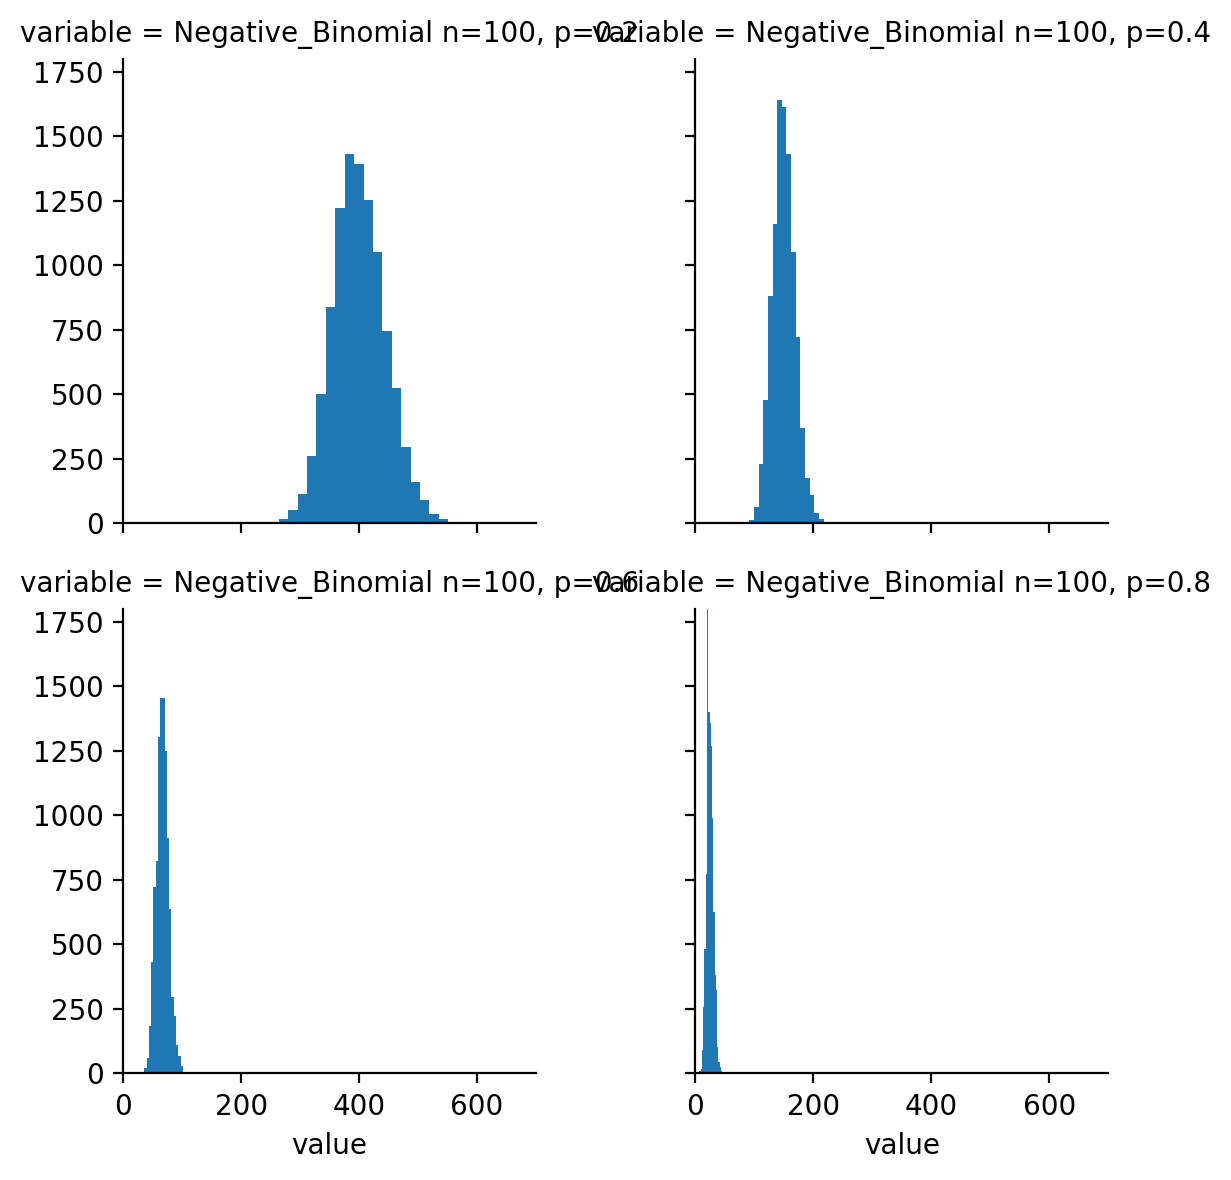

In [9]:
# Wyswietlam negative binomial
Visualization = sn.FacetGrid(meltedNegativeBinomial_comparison, col="variable", sharex=True, col_wrap=2)
Visualization.map(plt.hist, "value", cumulative=False, bins=20)
Visualization.set(xlim=(0, 700), ylim=(0, 1800))

There is hardly any difference visible, between the negative binomial and poisson distributions. It would be difficult to say which one is which with no information about them.


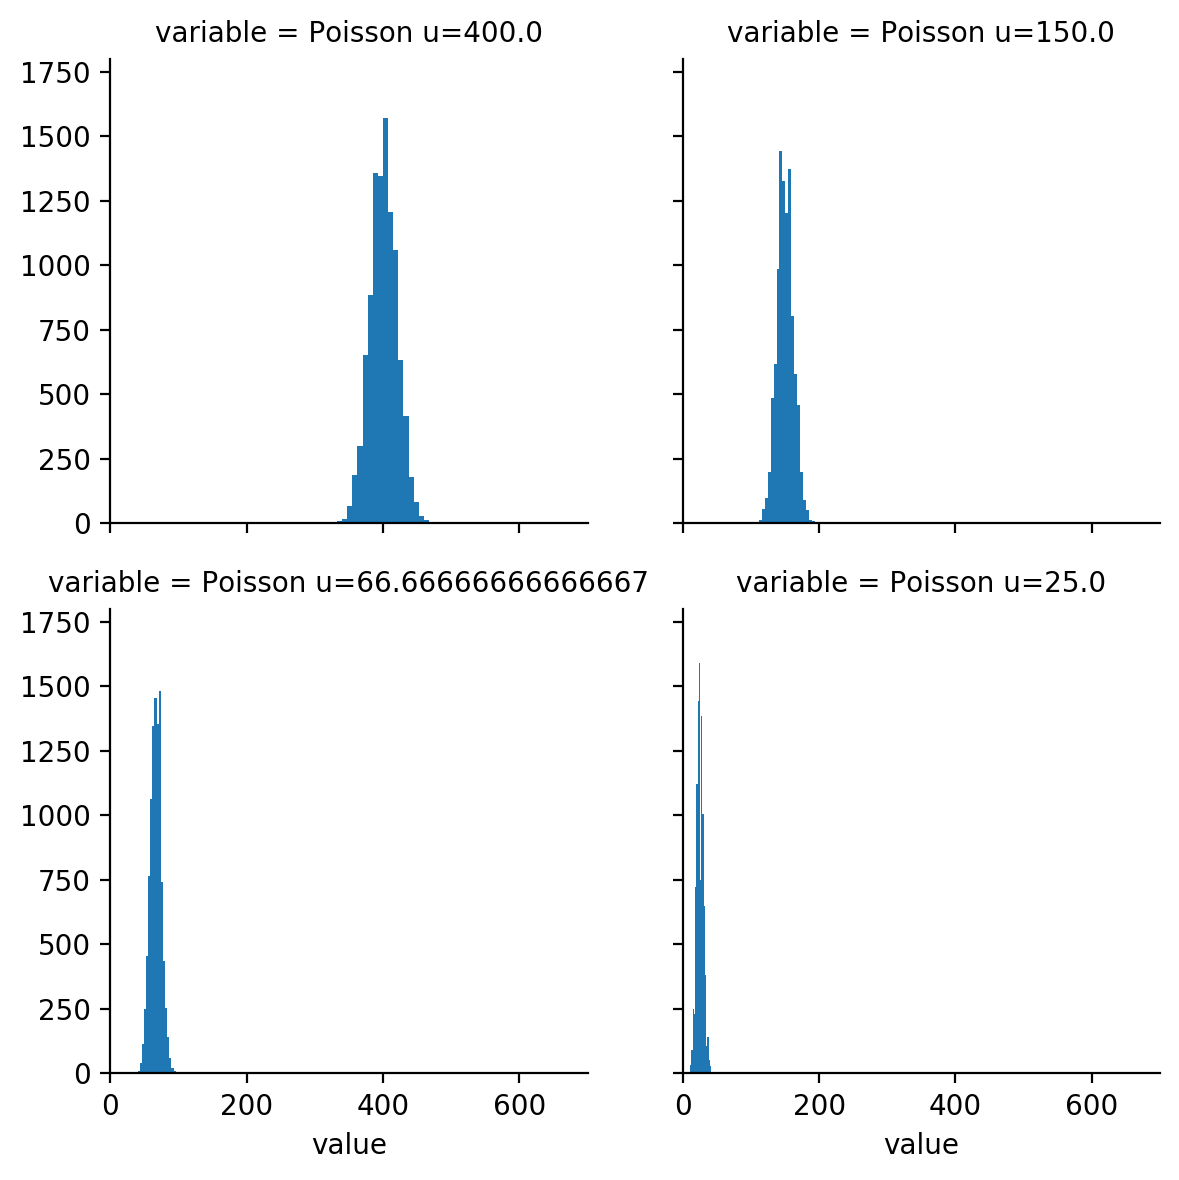

In [10]:
# Wyswietlam Poissona
Visualization = sn.FacetGrid(meltedPoisson_comparison, col="variable", sharex=True, col_wrap=2)
Visualization.map(plt.hist, "value", cumulative=False, bins=20)
Visualization.set(xlim=(0, 700), ylim=(0, 1800))

# Wartosciowy komentarz:
print(colored("There is hardly any difference visible, between the negative binomial and poisson distributions. It would be difficult to say which one is which with no information about them.", 'red'))

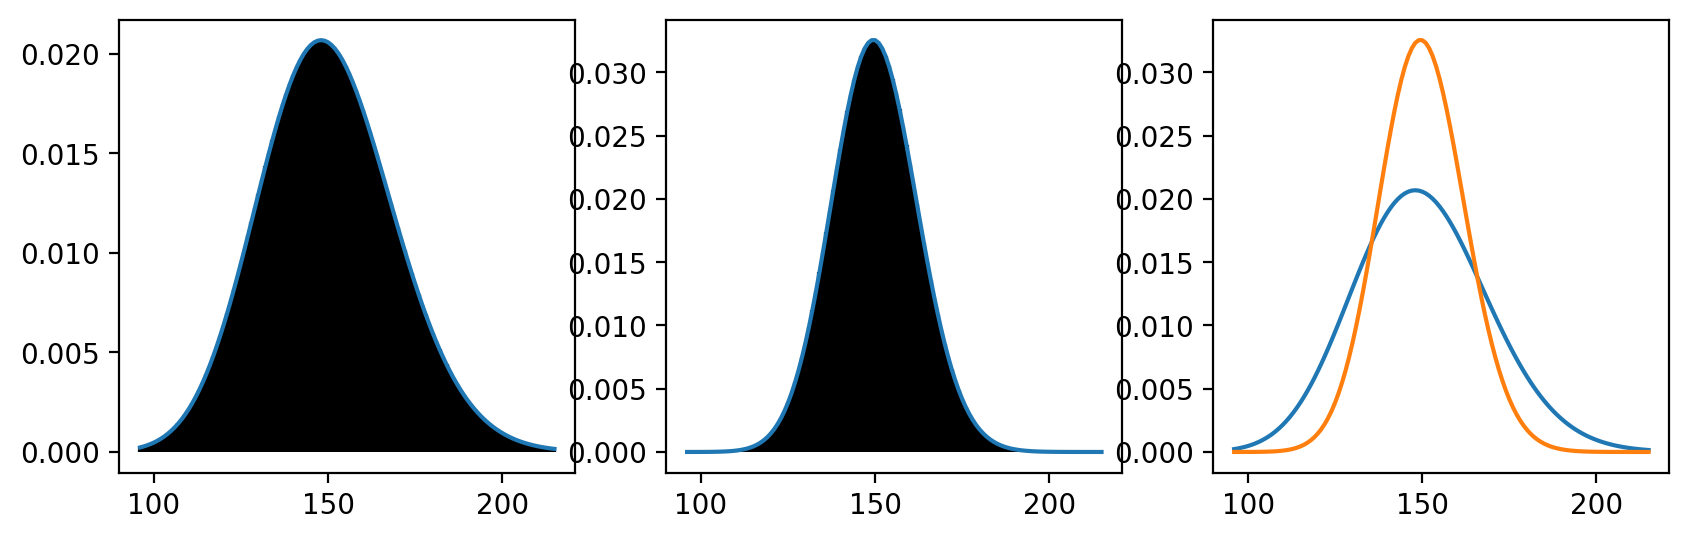

In [11]:
import scipy.stats as stats
import matplotlib as mpl

plt.figure(figsize=(10,3))

n=100
x_axis = np.arange(stats.nbinom.ppf(0.001, n, p[1]), stats.nbinom.ppf(0.999, n, p[1]))

negativeBinomial = stats.nbinom.pmf(x_axis, n, p[1])
poisson = stats.poisson.pmf(x_axis, u[1])

plt.subplot(1,3,1)
plt.plot(x_axis, negativeBinomial)
plt.vlines(x_axis, 0, negativeBinomial)

plt.subplot(1,3,2)
plt.plot(x_axis, poisson)
plt.vlines(x_axis, 0, poisson)

plt.subplot(1,3,3)
plt.plot(x_axis, negativeBinomial)
plt.plot(x_axis, poisson)

plt.show()